In [482]:
import numpy as np
import pandas as pd
from sklearn import datasets

%pylab inline
# Загружаем набор данных Ирисы:
iris = datasets.load_iris()
# Смотрим на названия переменных
target_names=iris.target_names
target=iris.target
#target.shape=(target.shape[0],1)
names=iris.feature_names
features=iris.data
print (names)
print(features[:10])
print (target_names)
print (target)

Populating the interactive namespace from numpy and matplotlib
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [483]:
#normilizing 
# axis=0 imply to sum it over columns only
features_normalized = (features - features.min(axis=0)) / (features.max(axis=0) - features.min(axis=0)) 
print (features_normalized[:10])

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]]


In [484]:

def splitting (f, t):
    ind = np.random.permutation(f.shape[0]) #mixing
    #print(ind)
    percentage = int(f.shape[0]  * 0.8) #first 80% for traininf the rest 20% for test
    ind_train, ind_test = ind[:percentage], ind[percentage:]
    #print ("number of trainings: ", percentage," number of tests: ", f.shape[0]-percentage )
    features_train, target_train = f[ind_train], t[ind_train]
    features_test, target_test = f[ind_test], t[ind_test]
    #print(features_test)
    #print(target_test)
    return features_train, target_train, features_test, target_test

In [485]:
import sklearn as sk
from sklearn import svm

In [486]:
from numpy import linalg as LA
def quality(predicted, actual):
    er=predicted-actual
    mistake = [f"Difference: {er}"] #if mistake show it
    accuracy = (LA.norm(predicted) - LA.norm(predicted-actual)) / LA.norm(predicted)
    return mistake, accuracy

In [487]:
def classifier(clf, num_of_tests=10): #automatically 10 tests
    np.random.seed(42)
    for i in range(num_of_tests):
        #np.random.seed(i)
        train_f, train_t, test_f, test_t = splitting(features, target)
        clf = sk.base.clone(clf)
        clf.fit(train_f, train_t)
        #print(test_t)
        #print(clf.predict(test_f))
        #print(test_t-clf.predict(test_f))
        error, score = quality(test_t, clf.predict(test_f))
        print(f"Iteration: {i}\n Expected: {test_t}\n Actual: {clf.predict(test_f)}\n {error}\n Score: {score}\n")

classifier(svm.SVC(), 100)

Iteration: 0
 Expected: [1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
 Actual: [1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 1 0 1 2]
 ['Difference: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]']
 Score: 0.8698110890191761

Iteration: 1
 Expected: [2 0 2 1 2 2 2 0 2 2 1 2 1 0 1 0 2 2 2 2 1 0 1 0 1 1 0 0 0 2]
 Actual: [2 0 2 1 2 2 2 0 2 2 1 2 1 0 2 0 2 2 2 2 1 0 1 0 1 1 0 0 0 2]
 ['Difference: [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0\n  0  0  0  0  0  0]']
 Score: 0.8709005551264194

Iteration: 2
 Expected: [0 0 2 1 2 1 2 1 2 0 1 0 2 2 0 0 1 2 0 0 2 2 0 2 2 2 2 0 0 2]
 Actual: [0 0 2 1 1 1 2 1 2 0 1 0 2 2 0 0 1 2 0 0 2 2 0 2 2 2 1 0 0 2]
 ['Difference: [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]']
 Score: 0.818928507914963

Iteration: 3
 Expected: [1 0 1 2 0 2 1 0 0 0 2 0 1 0 2 2 0 0 2 0 1 0 1 2 1 0 1 0 1 2]
 Actual: [1 0 1 2 0 2 1 0 0 0 2 0 1 0 2 2 0 0 2 0 1 0 1 2 1 0 1 0 1 2]
 ['Difference: [0 0 

In [488]:
#mistake : confusing 1 and 2 (=='versicolor' and 'virginica')

In [489]:
#average quality for all iteractions
def mean_score(clf, iteractions=100, normalized=True): #can chose between usual and normalized
    np.random.seed(42)
    clf = sk.base.clone(clf)
    sum_score = 0
    f = features_normalized if normalized else features
    for i in range(iteractions):
        train_f, train_t, test_f, test_t = splitting(f, target)
        clf.fit(train_f, train_t)
        sum_score += clf.score(test_f, test_t)
    return sum_score / iteractions

In [490]:
#linear kernel
#best result  C=0.5 without normalization

In [491]:
mean_score(svm.SVC(C=1, kernel="linear"), normalized=True)

0.952666666666667

In [492]:
mean_score(svm.SVC(C=1, kernel="linear"), normalized=False)

0.9746666666666671

In [493]:
mean_score(svm.SVC(C=0.7, kernel="linear"), normalized=True)

0.9520000000000006

In [494]:
mean_score(svm.SVC(C=0.7, kernel="linear"), normalized=False)

0.9763333333333338

In [495]:
mean_score(svm.SVC(C=0.5, kernel="linear"), normalized=True)

0.9480000000000004

In [496]:
mean_score(svm.SVC(C=0.5, kernel="linear"), normalized=False)

0.9783333333333338

In [497]:
mean_score(svm.SVC(C=0.3, kernel="linear"), normalized=True)

0.9226666666666665

In [498]:
mean_score(svm.SVC(C=0.3, kernel="linear"), normalized=False)

0.9720000000000004

In [499]:
#rbf kernel
#best result C=1 without normalization

In [500]:
mean_score(svm.SVC(C=1, kernel="rbf"), normalized=True)

0.9540000000000007

In [501]:
mean_score(svm.SVC(C=1, kernel="rbf"), normalized=False)

0.9580000000000005

In [502]:
mean_score(svm.SVC(C=0.7, kernel="rbf"), normalized=True)

0.9523333333333339

In [503]:
mean_score(svm.SVC(C=0.7, kernel="rbf"), normalized=False)

0.9536666666666672

In [504]:
mean_score(svm.SVC(C=0.5, kernel="rbf"), normalized=True)

0.9493333333333338

In [505]:
mean_score(svm.SVC(C=0.5, kernel="rbf"), normalized=False)

0.9533333333333338

In [506]:
mean_score(svm.SVC(C=0.3, kernel="rbf"), normalized=True)

0.9496666666666671

In [507]:
mean_score(svm.SVC(C=0.3, kernel="rbf"), normalized=False)

0.9426666666666671

In [508]:
#poly kernel
#best result  C=0.3 without normalization

In [509]:
mean_score(svm.SVC(C=1, kernel="poly"), normalized=True)

0.9486666666666668

In [510]:
mean_score(svm.SVC(C=1, kernel="poly"), normalized=False)

0.9620000000000003

In [511]:
mean_score(svm.SVC(C=0.7, kernel="poly"), normalized=True)

0.9493333333333335

In [512]:
mean_score(svm.SVC(C=0.7, kernel="poly"), normalized=False)

0.9610000000000005

In [513]:
mean_score(svm.SVC(C=0.5, kernel="poly"), normalized=True)

0.9526666666666671

In [514]:
mean_score(svm.SVC(C=0.5, kernel="poly"), normalized=False)

0.9653333333333337

In [515]:
mean_score(svm.SVC(C=0.3, kernel="poly"), normalized=True)

0.9503333333333335

In [516]:
mean_score(svm.SVC(C=0.3, kernel="poly"), normalized=False)

0.9660000000000004

In [517]:
np.random.seed(42)
train_f, train_t, test_f, test_t = splitting(features, target)
clf = svm.SVC(C=0.5, kernel="linear")
clf.fit(train_f, train_t)
clf.score(test_f, test_t)

0.9666666666666667

In [518]:
from sklearn import decomposition #need two agruments
pca = decomposition.PCA(n_components=2)
pca.fit(features)
new_features = pca.transform(features)
print(new_features)

[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

In [519]:
np.random.seed(42)
train_f, train_t, test_f, test_t = splitting(new_features, target)
clf = svm.SVC(C=0.5, kernel="linear")
clf.fit(train_f, train_t)
clf.score(test_f, test_t)

0.9666666666666667

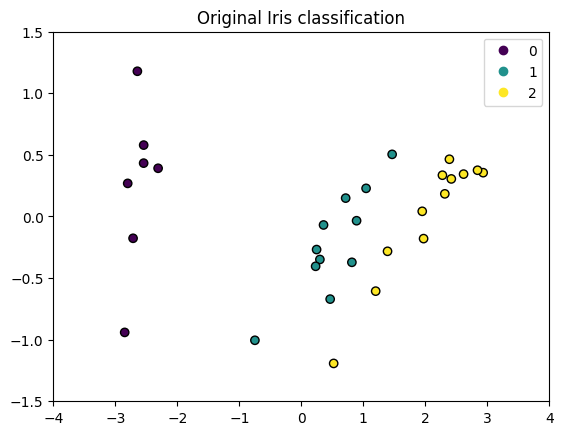

In [520]:
import matplotlib.pyplot as plt
colours = np.unique(test_t, return_inverse=True)[1] #different colours for different kinds of iris
labels = np.unique(test_t, return_inverse=True)[0].tolist() #list of points (examples)

sc = plt.scatter(test_f[:,0], test_f[:,1], c=colours, edgecolors="k")
plt.title("Original Iris classification")
plt.legend(handles=sc.legend_elements()[0], labels=labels)

plt.xlim([-4, 4])
plt.ylim([-1.5, 1.5])

plt.show()

In [521]:
#violet-setosa
#blue-versicolor
#yellow-virginica
# versicolor and virginia are very close => mistakes

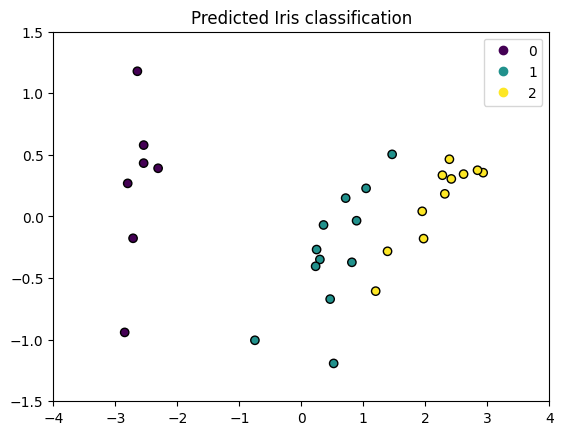

In [522]:
predicted = np.unique(clf.predict(test_f), return_inverse=True)[1] #showing of mistakes by confusing colours
#list is the same
pr_sc = plt.scatter(test_f[:,0], test_f[:,1], c=predicted, edgecolors="k")
plt.title("Predicted Iris classification")
plt.legend(handles=pr_sc.legend_elements()[0], labels=labels)
plt.xlim([-4, 4])
plt.ylim([-1.5, 1.5])
plt.show()